# Nama : Leni Estiyani
# Nim  : 09011181722004

# Prediksi sakit diabetes menggunakan metode jaringan saraf tiruan

Machine learning adalah bagian dari ilmu Kecerdasan Buatan atau dikenal juga sebagai AI (Artificial Intelligence). Konsep dari machine learning ini adalah pada pengembangan sistem yang dapat belajar “sendiri” tanpa perlu diprogram oleh manusia berulang kali.Ilmu pembelajaran mesin itu merupakan suatu kategori riset serta algoritma yang berfokus pada menemukan pola dalam suatu data. Pola tersebut kemudian digunakan untuk melakukan suatu prediksi.

Diabetes adalah penyakit kronis atau yang berlangsung jangka panjang yang ditandai dengan meningkatnya kadar gula darah (glukosa) hingga di atas nilai normal. Ada dua jenis utama diabetes, yaitu diabetes tipe 1 dan tipe 2.
Beberapa gejala diabetes tipe 1 dan tipe 2, antara lain:
Sering merasa haus.Frekuensi buang air kecil meningkat, terutama pada malam hari.Rasa lapar yang terus-menerus.Berat badan turun tanpa sebab yang jelas.Lemas dan merasa lelah.Pandangan yang kabur.Luka yang lama sembuh. Sering mengalami infeksi pada kulit, saluran kemih, gusi, atau vagina.
Dokter akan mendiagnosis diabetes pada seseorang dengan melakukan wawancara medis, pemeriksaan fisik, serta pemeriksaan penunjang seperti pemeriksaan darah dan urine.

In [8]:
# Memasukkan library yang akan digunakkan 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd

# Dataset

Data yang digunakan yaitu data diabetes bisa diakses dikaggle.

https://www.kaggle.com/johndasilva/diabetes 

# fitur data set

Pregnancies(kehamilan) 
	
Glucose (glukosa)
	
BloodPressure (tekanan darah)
	
SkinThickness (ketebalan kulit)
	
Insulin 
	
BMI
	
DiabetesPedigreeFunction (sisilah diabetes)
	
Age (usia)

# label dataset
	
Outcome (hasil)
positif diabetes (1) dan negatif (0)


In [9]:
#memasukkan dataset yang akan dianalisis
dataset = pd.read_csv('diabetes.csv',sep=',')

In [10]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [11]:
dataset = dataset.values

 # Set data dan Target
Set data untuk feature yaitu kolom 1-8 dan kolo 9 sebagai target

In [12]:
features = dataset[:,0:8]
labels = dataset [:, 8]

# Scaling
Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama.

In [13]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Spliting
dibawah ini merupakan proses pemisah /pemecah data yg disebut spliting. Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML lainnya sesuai tujuannya masing-masing.
Data fitur dan label dibagi menjadi data train dan test dengan ratio 8 : 2

In [14]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [15]:
labels

array([1., 0., 1., ..., 0., 1., 0.])

# Model
menggunakan 1 input dengan 8 neuron dan 1 output dengan 1 neuron
Disini digunakan model Sequential(). 
1. Input layer -> Layer pertama terbentuk dari 13 layer Neural sesuai fitur dengan menggunakan activation relu.
2. Hidden Layer pertama -> 100 units Neural Network dengan menggunakan activation relu.
3. Hidden Layer Kedua -> 80 units Neural Network dengan menggunakan activation relu.
4. Output layer -> 0.5 unit Neural Network dengan menggunakan activation sigmoid.

In [33]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 8, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

# Dibawah ini merupakan proses training dan testing data

In [34]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=32, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 0s 281us/step - loss: 0.6594 - acc: 0.6481 - val_loss: 0.6427 - val_acc: 0.6600
Epoch 2/100
1600/1600 [==============================] - 0s 50us/step - loss: 0.6317 - acc: 0.6656 - val_loss: 0.6200 - val_acc: 0.6925
Epoch 3/100
1600/1600 [==============================] - 0s 57us/step - loss: 0.5964 - acc: 0.6950 - val_loss: 0.5832 - val_acc: 0.6825
Epoch 4/100
1600/1600 [==============================] - 0s 56us/step - loss: 0.5657 - acc: 0.7150 - val_loss: 0.5566 - val_acc: 0.7175
Epoch 5/100
1600/1600 [==============================] - 0s 50us/step - loss: 0.5338 - acc: 0.7481 - val_loss: 0.5399 - val_acc: 0.7200
Epoch 6/100
1600/1600 [==============================] - 0s 56us/step - loss: 0.5148 - acc: 0.7575 - val_loss: 0.5266 - val_acc: 0.7175
Epoch 7/100
1600/1600 [==============================] - 0s 56us/step - loss: 0.4972 - acc: 0.7650 - val_loss: 0.5124 - val_acc: 0.7325


1600/1600 [==============================] - 0s 53us/step - loss: 0.3961 - acc: 0.8200 - val_loss: 0.4465 - val_acc: 0.7550
Epoch 61/100
1600/1600 [==============================] - 0s 43us/step - loss: 0.3919 - acc: 0.8250 - val_loss: 0.4392 - val_acc: 0.7675
Epoch 62/100
1600/1600 [==============================] - 0s 53us/step - loss: 0.3924 - acc: 0.8325 - val_loss: 0.4348 - val_acc: 0.7650
Epoch 63/100
1600/1600 [==============================] - 0s 59us/step - loss: 0.3895 - acc: 0.8200 - val_loss: 0.4355 - val_acc: 0.7875
Epoch 64/100
1600/1600 [==============================] - 0s 53us/step - loss: 0.3844 - acc: 0.8306 - val_loss: 0.4311 - val_acc: 0.7775
Epoch 65/100
1600/1600 [==============================] - 0s 53us/step - loss: 0.3894 - acc: 0.8231 - val_loss: 0.4344 - val_acc: 0.7750
Epoch 66/100
1600/1600 [==============================] - 0s 43us/step - loss: 0.3887 - acc: 0.8344 - val_loss: 0.4274 - val_acc: 0.7850
Epoch 67/100
1600/1600 [==============================

# Akurasi
proses perhitungan ketelitiannya atau disebut akurasi

In [35]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.785


In [36]:
acc_training.history

{'val_loss': [0.6427019333839417,
  0.6200287818908692,
  0.5831628012657165,
  0.5565995287895202,
  0.5398683214187622,
  0.5266191363334656,
  0.5123828327655793,
  0.4985469019412994,
  0.5004177176952362,
  0.5014104318618774,
  0.48848246812820434,
  0.48541285991668703,
  0.4847011375427246,
  0.4952136254310608,
  0.4811791729927063,
  0.4777220606803894,
  0.4797516703605652,
  0.47383920192718504,
  0.47479532718658446,
  0.4725131416320801,
  0.4874089527130127,
  0.46528121948242185,
  0.46751317143440246,
  0.46707418203353884,
  0.4867038583755493,
  0.47104862570762634,
  0.4616626524925232,
  0.4599961030483246,
  0.46434358358383176,
  0.4609990680217743,
  0.46000142574310304,
  0.4702437210083008,
  0.45930538773536683,
  0.4568932580947876,
  0.4563042986392975,
  0.46535401821136474,
  0.4516896080970764,
  0.4509106135368347,
  0.4615262842178345,
  0.45058430671691896,
  0.45045681595802306,
  0.47292170763015745,
  0.45261999368667605,
  0.4441274678707123,
  0.

# Plot
dibawah ini merupakan proses ploting/perbandingan

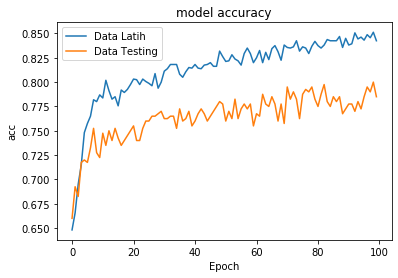

In [38]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

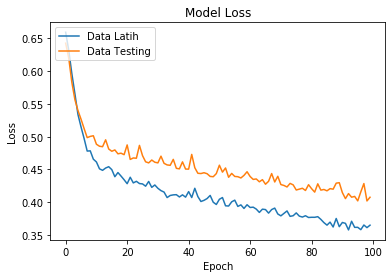

In [39]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

In [40]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [41]:
training_predicted

array([[0.32657886],
       [0.25908333],
       [0.00497946],
       ...,
       [0.01054478],
       [0.9129789 ],
       [0.01887986]], dtype=float32)

# Matrix
proses perhitungan akurasi pada konsep data mining atau sering juga disebut sistem pendukung keputusan

In [42]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())


In [43]:
training_cm

array([[972,  81],
       [169, 378]], dtype=int64)

In [44]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.84375
Specificity training 0.6910420475319927
Sensitivity training 0.9230769230769231
Precision training 0.8518843120070114
F1 Score training 0.8860528714676391


In [45]:
print(testing_cm)

[[218  45]
 [ 41  96]]


In [46]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.785
Specificity testing 0.7007299270072993
Sensitivity testing 0.8288973384030418
Precision testing 0.8416988416988417
F1 Score testing 0.8352490421455939
